# Project: Wrangling and Analyze Data

In [1]:
# Import all libraries and packages needed for he project
import os
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering

In the cells below I'll gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

**1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv). File is available for download [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)**

I have downloaded this file already and saved in the project folder

In [2]:
#Read in twitter achive enhanced data
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
print(tweet_archive.shape)
tweet_archive.head(1)

(2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


**2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)**

In [3]:
# download and write to image-prediction.tsv
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1], 'wb') as file:
        file.write(r.content)

In [4]:
# read in the tsv file and save to dataframe
image_prediction = pd.read_csv('image-predictions.tsv', sep ='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

In other to keep the API credentials hidden, I've saved them to a file called `twitterapikey.txt`. I'll read the file in and assign the keys appropriately

In [5]:
# get tweet Ids for which to query tweets from the twitter_archive dataframe
ids = tweet_archive.tweet_id.values
len(ids)

2356

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# Read twitterapikey.txt fiel and assign API keys
with open('twitterapikey.txt', 'r', encoding='UTF-8') as file:
    consumer_key = file.readline().strip()
    consumer_secret = file.readline().strip()
    access_token = file.readline().strip()
    access_secret = file.readline().strip()

# Set Authentication for API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True)


# Query Twitter's API for JSON data of every tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as file:
    for _id in ids:
        count += 1
        print(str(count) + ": " + str(_id))
        try:
            tweet = api.get_status(_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 305


Fail
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success
933

Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 342


Fail
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833:

Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
20

Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
23

In [7]:
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])
len(fails_dict)

888202515573088257 404 Not Found
144 - No status found with that ID.
877611172832227328 403 Forbidden
179 - Sorry, you are not authorized to see this status.
873697596434513921 404 Not Found
144 - No status found with that ID.
872668790621863937 404 Not Found
144 - No status found with that ID.
872261713294495745 404 Not Found
144 - No status found with that ID.
869988702071779329 404 Not Found
144 - No status found with that ID.
866816280283807744 404 Not Found
144 - No status found with that ID.
861769973181624320 404 Not Found
144 - No status found with that ID.
856602993587888130 404 Not Found
144 - No status found with that ID.
856330835276025856 404 Not Found
144 - No status found with that ID.
851953902622658560 404 Not Found
144 - No status found with that ID.
851861385021730816 404 Not Found
144 - No status found with that ID.
845459076796616705 404 Not Found
144 - No status found with that ID.
844704788403113984 404 Not Found
144 - No status found with that ID.
84289220886492

32

After inspecting the failed queries, I'll retry the tweet where the connection was reset.

In [8]:
#read in the tweet.json file
tweet_json = pd.read_json('tweet_json.txt', lines=True)
tweet_json.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [9]:
tweet_json.shape

(2324, 32)

In [10]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2324 non-null   datetime64[ns, UTC]
 1   id                             2324 non-null   int64              
 2   id_str                         2324 non-null   int64              
 3   full_text                      2324 non-null   object             
 4   truncated                      2324 non-null   bool               
 5   display_text_range             2324 non-null   object             
 6   entities                       2324 non-null   object             
 7   extended_entities              2054 non-null   object             
 8   source                         2324 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

## Assessing Data
In this section, we are to detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment and programmatic assessement to assess all 3 datasets.
- tweet_archive
- image_prediction
- tweet_json


In [11]:
tweet_archive.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
776,776113305656188928,NaN,NaN,2016-09-14 17:40:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sampson. He's about to get hit with a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776113305...,11,10,Sampson,None,None,pupper,None
1361,703079050210877440,NaN,NaN,2016-02-26 04:48:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Butternut Cumberfloof. It's not wind...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703079050...,11,10,a,None,None,None,None
371,828408677031882754,NaN,NaN,2017-02-06 01:03:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bear. He went outside to play in the s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828408677...,12,10,Bear,None,None,None,None
339,832273440279240704,NaN,NaN,2017-02-16 17:00:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Smiley. He's a blind therapy dogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832273440...,14,10,Smiley,doggo,None,None,None
1109,733828123016450049,NaN,NaN,2016-05-21 01:13:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Terry. The harder you hug him the fart...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733828123...,10,10,Terry,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
1143,727314416056803329,NaN,NaN,2016-05-03 01:50:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper was about to explain where that di...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727314416...,11,10,None,None,None,pupper,None
2112,670435821946826752,NaN,NaN,2015-11-28 02:55:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two unbelievably athletic dogs here. Great for...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670435821...,10,10,None,None,None,None,None
305,836260088725786625,NaN,NaN,2017-02-27 17:01:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She spent all morning overseeing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836260088...,13,10,Lucy,None,None,None,None
2221,668480044826800133,NaN,NaN,2015-11-22 17:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to DayZ. She is definitely stuck on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668480044...,11,10,DayZ,None,None,None,None


__*Quality issue*:__

1. Retweets included in dataset

In [12]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

__*Quality issue*:__

1. Missing information in the following columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp, expanded_urls)
2. Erroneous datatypes (timestamp, retweeted_status_timestamp)

In [13]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [14]:
tweet_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
tweet_archive[tweet_archive.rating_denominator == 16]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None


In [16]:
tweet_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:
tweet_archive.query("tweet_id == 670427002554466305")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None


In [18]:
tweet_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [19]:
tweet_archive.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [20]:
tweet_archive.duplicated().sum()

0

In [21]:
tweet_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [22]:
len(tweet_archive['name'].unique())

957

#### Quality Issues
`tweet_archive` table
  1. Inaccurate name for some dogs (a, this, not, etc)

In [23]:
image_prediction.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
978,707059547140169728,https://pbs.twimg.com/media/Cc_64zVWEAAeXs7.jpg,1,Samoyed,0.897312,True,Great_Pyrenees,0.039180,True,kuvasz,0.019516,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.004020,True
793,690735892932222976,https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg,1,golden_retriever,0.883229,True,Labrador_retriever,0.109635,True,kuvasz,0.002795,True
1640,807059379405148160,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
995,708149363256774660,https://pbs.twimg.com/media/CdPaEkHW8AA-Wom.jpg,1,Cardigan,0.350993,True,basset,0.164555,True,toy_terrier,0.080484,True
230,670408998013820928,https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg,1,ping-pong_ball,0.999945,False,tennis_ball,0.000018,False,racket,0.000015,False
1794,831309418084069378,https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg,1,Doberman,0.369389,True,kelpie,0.132449,True,Labrador_retriever,0.074727,True
392,673580926094458881,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,beagle,0.985062,True,basset,0.006418,True,Walker_hound,0.003533,True
843,695064344191721472,https://pbs.twimg.com/ext_tw_video_thumb/69506...,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False


In [24]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
image_prediction.duplicated().sum()

0

In [27]:
tweet_json.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [28]:
user_type = type(tweet_json["extended_entities"][0])
user_type

dict

In [29]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2324 non-null   datetime64[ns, UTC]
 1   id                             2324 non-null   int64              
 2   id_str                         2324 non-null   int64              
 3   full_text                      2324 non-null   object             
 4   truncated                      2324 non-null   bool               
 5   display_text_range             2324 non-null   object             
 6   entities                       2324 non-null   object             
 7   extended_entities              2054 non-null   object             
 8   source                         2324 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

#### Quality Issues
`tweet_json` table
  1. Missing information in the numerous columns 
  2. id_str have datatype int instead of string


In [30]:
tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.324000e+03,2.324000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2324.000000,2324.000000,2192.0,2192.0,2.500000e+01,2.500000e+01
mean,7.417552e+17,7.417552e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2407.239243,6824.766781,0.0,0.0,8.111370e+17,8.111370e+17
std,6.817959e+16,6.817959e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4075.199665,10602.883201,0.0,0.0,6.424241e+16,6.424241e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.781974e+17,6.781974e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,481.750000,1185.250000,0.0,0.0,7.719056e+17,7.719056e+17
50%,7.178159e+17,7.178159e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1117.000000,2955.500000,0.0,0.0,8.322683e+17,8.322683e+17
75%,7.986494e+17,7.986494e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,2786.250000,8342.500000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,68862.000000,140664.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [31]:
tweet_json.sample(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
440,2017-01-07 20:18:46+00:00,817827839487737858,817827839487737856,This is Buddy. He ran into a glass door once. ...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 817827663108771841, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2140,2015-11-25 01:30:16+00:00,669327207240699904,669327207240699904,Just got home from college. Dis my dog. She do...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669327198734655488, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [32]:
new_json =""
for i in [str(i) for i in tweet_json.extended_entities.tolist()]:
    new_json += (i + "\n")

print(new_json)



# tweet_json_clean.apply(lambda x: pd.Series(
#                                 json.loads(x['extended_entities']).values(),
#                                 index=json.loads(x['extended_entities']).keys()), 
#                                 axis=1)

#pd.json_normalize(tweet_json['extended_entities'])

{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}
{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', '

In [33]:
tweet_json.extended_entities[587]

{'media': [{'id': 797971806841802752,
   'id_str': '797971806841802752',
   'indices': [90, 113],
   'media_url': 'http://pbs.twimg.com/media/CxL3IWeVEAAAIE2.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/CxL3IWeVEAAAIE2.jpg',
   'url': 'https://t.co/GRWPgNKt2z',
   'display_url': 'pic.twitter.com/GRWPgNKt2z',
   'expanded_url': 'https://twitter.com/dog_rates/status/797971864723324932/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 2048, 'h': 1360, 'resize': 'fit'},
    'small': {'w': 680, 'h': 452, 'resize': 'fit'},
    'medium': {'w': 1200, 'h': 797, 'resize': 'fit'}}},
  {'id': 797971807168925696,
   'id_str': '797971807168925696',
   'indices': [90, 113],
   'media_url': 'http://pbs.twimg.com/media/CxL3IXsUkAAWSSn.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/CxL3IXsUkAAWSSn.jpg',
   'url': 'https://t.co/GRWPgNKt2z',
   'display_url': 'pic.twitter.com/GRWPgNKt2z',
   'expanded_url': 'https://twitter

In [34]:
tweet_json.id.duplicated().sum()

0

#### Quality Issues
`tweet_archive` table
  1. Missing information in the following columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp)
  2. Missing information in `expanded_urls` column
  3. Erroneous datatypes (`timestamp`, `retweeted_status_timestamp`)
  4. Retweets included in tweet_archive dataset
  5. Inaccurate name for some dogs (a, this, not, etc)
  
`tweet_json` table

  6. Retweets included in dataset
  7. Missing information in numerous columns. No data in `geo`, `coordinates`, `place`, and `contributors` column
  8. Rename `id` column to `tweet_id` for uniformity in column



#### Tidiness Issues
`tweet_json` and `tweet_archive` table

  9. `user` column is not needed since there's only one user 
  10. `extended_entities` column is almost identical to the `entities` column
  11. Repeated columns in `int` and `str` formats
  12. Dog stage proken into 4 different columns (`doggo`, `puppo`, `pupper`, `floofer`)
  13. Prediction columns in `image_prediction` table can be merged to form dog_breed column
  14. All three datasets can be joined to form one master dataset with tweetid as the common column.
 

## Cleaning Data
In this section, I'll clean **all** of the issues documented while assessing. 


In [35]:
#Make Copies of original pieces of data
tweet_archive_clean = tweet_archive.copy()
tweet_json_clean = tweet_json.copy()
image_prediction_clean = image_prediction.copy()

### Issue #1

#### Define:
1. Rectify missing information in the following columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp) by dropping the columns

All the above listed columns have over 50% null values. We'll drop all columns with less over 50% null values

#### Code:

In [36]:
# Drop columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp)

tweet_archive_clean.drop(labels=["in_reply_to_status_id", 
                                 "in_reply_to_user_id", 
                                 "retweeted_status_id", 
                                 "retweeted_status_user_id"
                                 ,"retweeted_status_timestamp"], axis=1, inplace=True)

#### Test

In [37]:
tweet_archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


## Issue #2

#### Define:
2. Fill up missing values in `expanded _url` column. We can get the expanded url by concatenating "https://twitter.com/dog_rates/status/", `tweet_id`, and "/photo/1"

In [38]:
tweet_archive_clean.expanded_urls.isnull().sum()

59

#### Code:

In [39]:
for index, i in tweet_archive_clean[tweet_archive_clean.expanded_urls.isnull()].iterrows():
    tw_id = int(i["tweet_id"])
    cond = tweet_archive_clean['tweet_id'] == tw_id
    tweet_archive_clean.loc[cond, "expanded_urls"] = "https://twitter.com/dog_rates/status/"+str(tw_id)+"/photo/1"

#### Test:

In [40]:
tweet_archive_clean.expanded_urls.isnull().sum()

0

# Issue #3

#### Define:
3. Change erroneous datatypes in `timestamp` column. convert to datetime datatypes. `retweeted_status_timestamp` has already been dropped in step 1

#### Code:

In [41]:
# Convert 'timestamp to datetime'
tweet_archive_clean['timestamp'] = pd.to_datetime(tweet_archive_clean['timestamp'])

#### Test:

In [42]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2356 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

# Issue #4

#### Define: 
  4. Remove retweets data included in dataset. Drop all rows in `tweet_archive` dataset where `text` starts with 'RT @dog_rates'

#### Code:

In [43]:
# Define confition for rows to be dropped
tweet_RT = tweet_archive_clean['text'].str.contains('RT @dog_rates', regex = True)
tweet_archive_clean = tweet_archive_clean[~tweet_RT]
tweet_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2033,671744970634719232,2015-12-01 17:37:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Very fit horned dog here. Looks powerful. Not ...,https://twitter.com/dog_rates/status/671744970...,6,10,None,None,None,None,None
346,831926988323639298,2017-02-15 18:03:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@UNC can confirm 12/10,https://twitter.com/dog_rates/status/831926988...,12,10,None,None,None,None,None
335,832645525019123713,2017-02-17 17:38:57+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None


#### Test:

In [44]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2200 non-null   int64              
 1   timestamp           2200 non-null   datetime64[ns, UTC]
 2   source              2200 non-null   object             
 3   text                2200 non-null   object             
 4   expanded_urls       2200 non-null   object             
 5   rating_numerator    2200 non-null   int64              
 6   rating_denominator  2200 non-null   int64              
 7   name                2200 non-null   object             
 8   doggo               2200 non-null   object             
 9   floofer             2200 non-null   object             
 10  pupper              2200 non-null   object             
 11  puppo               2200 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [45]:
tweet_archive_clean.sample(100)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
637,793286476301799424,2016-11-01 03:00:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Moreton. He's the Good Boy Who Lived. ...,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
1342,704819833553219584,2016-03-02 00:05:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chesterson. He's a Bolivian Scoop Dog....,https://twitter.com/dog_rates/status/704819833...,7,10,Chesterson,None,None,None,None
441,819711362133872643,2017-01-13 01:03:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Howie. He just bloomed. 11/10 revoluti...,https://twitter.com/dog_rates/status/819711362...,11,10,Howie,None,None,None,None
1069,740365076218183684,2016-06-08 02:09:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When the photographer forgets to tell you wher...,https://twitter.com/dog_rates/status/740365076...,10,10,None,None,None,None,None
920,756303284449767430,2016-07-22 01:42:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Pwease accept dis rose on behalf of dog. 11/10...,https://twitter.com/dog_rates/status/756303284...,11,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2279,667405339315146752,2015-11-19 18:13:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,None,None,None,None
1326,706153300320784384,2016-03-05 16:24:01+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Layla. She's giving you a standing ova...,https://vine.co/v/iXidJXBJ3P9,13,10,Layla,None,None,None,None
1929,674042553264685056,2015-12-08 01:47:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle the cuteness anymore. Curls...,https://twitter.com/dog_rates/status/674042553...,12,10,None,None,None,None,None
525,809084759137812480,2016-12-14 17:16:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. You said you brushed your tee...,https://twitter.com/dog_rates/status/809084759...,11,10,Wallace,None,None,None,None


# Issue #5

#### Define: 
  5. Remove retweets data included in dataset. Drop all rows in `tweet_json` dataset where `full_text` starts with 'RT @dog_rates'

#### Code:

In [46]:
# Define confition for rows to be dropped
tweet1_RT = tweet_json_clean['full_text'].str.contains('RT @dog_rates', regex = True)
tweet_json_clean = tweet_json_clean[~tweet_RT]

C:\Users\kenechukwu.ifediorah\AppData\Local\Temp\ipykernel_2328\1059749192.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tweet_json_clean = tweet_json_clean[~tweet_RT]


#### Test:

In [47]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2323
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2168 non-null   datetime64[ns, UTC]
 1   id                             2168 non-null   int64              
 2   id_str                         2168 non-null   int64              
 3   full_text                      2168 non-null   object             
 4   truncated                      2168 non-null   bool               
 5   display_text_range             2168 non-null   object             
 6   entities                       2168 non-null   object             
 7   extended_entities              1930 non-null   object             
 8   source                         2168 non-null   object             
 9   in_reply_to_status_id          72 non-null     float64            
 10  in_reply_to_status_id_st

In [48]:
tweet_json_clean.sample(100)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1185,2016-03-30 02:56:24+00:00,715009755312439296,715009755312439296,This is Siba. She's remarkably mobile. Very sl...,False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 715009744965120000, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
975,2016-06-28 04:42:46+00:00,747651430853525504,747651430853525504,Other pupper asked not to have his identity sh...,False,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.476487e+17,...,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
933,2016-07-06 15:54:42+00:00,750719632563142656,750719632563142656,This is Meyer. He has to hold somebody's hand ...,False,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 750719617786609664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1940,2015-12-05 20:41:29+00:00,673240798075449344,673240798075449344,Magical floating dog here. Very calm. Always h...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673240782124548096, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1443,2016-01-31 04:11:58+00:00,693647888581312512,693647888581312512,What kind of person sends in a pic without a d...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 693647886148567040, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,2015-12-04 04:56:09+00:00,672640509974827008,672640509974827008,This is Leonidas. He just got rekt by a snowba...,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672640493281411072, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
396,2017-01-21 03:29:14+00:00,822647212903690241,822647212903690240,RT @dog_rates: This is Paisley. She really wan...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 822489041455157248, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,{'created_at': 'Fri Jan 20 17:00:46 +0000 2017...,NaN,NaN,NaN,NaN
523,2016-12-06 02:15:59+00:00,805958939288408065,805958939288408064,RT @dog_rates: This is Penny. She fought a bee...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 782722587017285632, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,{'created_at': 'Sun Oct 02 23:23:04 +0000 2016...,NaN,NaN,NaN,NaN
1937,2015-12-06 01:48:12+00:00,673317986296586240,673317986296586240,Take a moment and appreciate how these two dog...,False,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673317979384254464, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


# Issue #6

#### Define:
 5. Replace inaccurate name for dogs (a, this, not, etc) in tweet_archive dataset with `None`. A common characteristic of these names is that they are not capitalized as all proper nouns should be.

#### Code:

In [49]:
# use replace and regex matching to replace the texts
tweet_archive_clean.name.replace(to_replace=r'\b[a-z][a-zA-Z0-9]*', value='None', regex=True, inplace=True)

#### Test:

In [50]:
tweet_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

# Issue #7

#### Define:

  7. a. Drop columns where missing data is less than 50% of total data. These are (in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, place, geo, coordinates, contributors, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status_permalink, quoted_status)
  
     b. Fill the other numeric columns that have less than 25% missing data with the mean value

#### Code:

In [51]:
# use drop method to drop the columns

tweet_json_clean.drop(labels=["in_reply_to_status_id",
                              "in_reply_to_status_id_str",
                              "in_reply_to_user_id", 
                              "in_reply_to_user_id_str",
                              "in_reply_to_screen_name",
                              "place",
                              "geo",
                              "coordinates",
                              "contributors",
                              "retweeted_status", 
                              "quoted_status_id",
                              "quoted_status_id_str",
                              "quoted_status_permalink",
                              "quoted_status"], axis=1, inplace=True)

In [52]:
tweet_json_clean['possibly_sensitive'].fillna(tweet_json_clean['possibly_sensitive'].mean(), inplace=True)
tweet_json_clean['possibly_sensitive_appealable'].fillna(tweet_json_clean['possibly_sensitive_appealable'].mean(), inplace=True)

#### Test:

In [53]:
tweet_json_clean.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6825,32694,False,False,0.0,0.0,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,5140,28264,False,False,0.0,0.0,en


In [54]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2323
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2168 non-null   datetime64[ns, UTC]
 1   id                             2168 non-null   int64              
 2   id_str                         2168 non-null   int64              
 3   full_text                      2168 non-null   object             
 4   truncated                      2168 non-null   bool               
 5   display_text_range             2168 non-null   object             
 6   entities                       2168 non-null   object             
 7   extended_entities              1930 non-null   object             
 8   source                         2168 non-null   object             
 9   user                           2168 non-null   object             
 10  is_quote_status         

# Issue #8

#### Define:
  8. Rename `id` column to `tweet_id` for uniformity in column

#### Code:

In [55]:
tweet_json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test:

In [56]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2323
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2168 non-null   datetime64[ns, UTC]
 1   tweet_id                       2168 non-null   int64              
 2   id_str                         2168 non-null   int64              
 3   full_text                      2168 non-null   object             
 4   truncated                      2168 non-null   bool               
 5   display_text_range             2168 non-null   object             
 6   entities                       2168 non-null   object             
 7   extended_entities              1930 non-null   object             
 8   source                         2168 non-null   object             
 9   user                           2168 non-null   object             
 10  is_quote_status         

# Issue #9

#### Define:
  9. Drop the `user` column that is not needed since there's only one user for all tweet data

#### Code:

In [57]:
# use drop method to drop the column

tweet_json_clean.drop(labels=["user"], axis=1, inplace=True)

#### Test:

In [58]:
tweet_json_clean.head(1)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",False,6825,32694,False,False,0.0,0.0,en


# Issue #10

#### Define:
  10. Drop the `extended_entities` column because it holds almost identical data to the `entities` column

#### Code:

In [59]:
# use drop method to drop the column

tweet_json_clean.drop(labels="extended_entities", axis=1, inplace=True)

#### Test:

In [60]:
tweet_json_clean.head(1)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,source,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",False,6825,32694,False,False,0.0,0.0,en


# Issue #11

#### Define:  
  11. Drop the repeated id columns in `str` format


#### Code:

In [61]:
# use drop method to drop the column

tweet_json_clean.drop(labels="id_str", axis=1, inplace=True)

#### Test:

In [62]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2323
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2168 non-null   datetime64[ns, UTC]
 1   tweet_id                       2168 non-null   int64              
 2   full_text                      2168 non-null   object             
 3   truncated                      2168 non-null   bool               
 4   display_text_range             2168 non-null   object             
 5   entities                       2168 non-null   object             
 6   source                         2168 non-null   object             
 7   is_quote_status                2168 non-null   bool               
 8   retweet_count                  2168 non-null   int64              
 9   favorite_count                 2168 non-null   int64              
 10  favorited               

# Issue #12

#### Define:  
  12. Merge `doggo`, `puppo`, `pupper`, `floofer` into one column called `dog_stage` and drop those columns.

#### Code:

In [63]:
# Define function to enter data into new column

def dog_stage(tweet):
    if tweet['doggo'] == 'doggo':
        return 'doggo'
    elif tweet['puppo'] == 'puppo':
        return 'puppo'
    elif tweet['floofer'] == 'floofer':
        return 'floofer'
    elif tweet['pupper'] == 'pupper':
        return 'pupper'
    else:
        return 'None'

# Apply function to tweet_archive dataset

tweet_archive_clean['dog_stage'] = tweet_archive_clean.apply(lambda row: dog_stage(row), axis=1)


# Drop the columns
tweet_archive_clean.drop(labels=['pupper',
                                'puppo',
                                 'floofer',
                                 'doggo'
                                ], axis=1, inplace=True
                        )

#### Test:

In [64]:
tweet_archive_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


# Issue #13

#### Define:  
  13. Create function to examine p1, p2, p3 and p4 columns and select the most suitable breed of dog in `image_prediction` table to form `dog_breed` column.

#### Code:

In [65]:
# Create function to find best fit breed

def get_breed(tw):
    predictions = []
    if tw['p1_dog']:
        predictions.append('p1_conf')
    if tw['p2_dog']:
        predictions.append('p2_conf')
    if tw['p3_dog']:
        predictions.append('p3_conf')
    try:
        value = max([tw[i] for i in predictions])
        return tw[tw[tw == value].index[0][:2]]
    except ValueError:
        return 'None'

# Apply the function to create dog_breed column
image_prediction_clean['dog_breed'] = image_prediction_clean.apply(lambda dog: get_breed(dog), axis=1)

In [66]:
# Drop the irrelevant columns
image_prediction_clean.drop(labels=["p1",
                              "p1_dog",
                              "p1_conf", 
                              "p2",
                              "p2_dog",
                              "p2_conf", 
                              "p3",
                              "p3_dog",
                              "p3_conf"], axis=1, inplace=True)

#### Test:

In [67]:
image_prediction_clean.head(2)

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone


# Issue #14

#### Define:  
  14. merge all three datasets to form one master dataset using `tweetid` as the common column. Drop the `source_y` and `created_at` and `text` columns in dataset because they are all duplicated. Then rename `source_x` to `source`.

#### Code:

In [68]:
tweet_archive_master = tweet_archive_clean.merge(tweet_json_clean, on='tweet_id', how='inner').merge(image_prediction_clean, on='tweet_id', how='inner')

In [69]:
tweet_archive_master.drop(labels=["source_y",
                              "created_at",
                              "text"], axis=1, inplace=True)

In [70]:
tweet_archive_master.rename(columns={'source_x':'source'}, inplace=True)

#### Test:

In [71]:
tweet_archive_master.head(2)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,full_text,truncated,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,jpg_url,img_num,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,This is Phineas. He's a mystical boy. Only eve...,False,...,6825,32694,False,False,0.0,0.0,en,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,This is Tilly. She's just checking pup on you....,False,...,5140,28264,False,False,0.0,0.0,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua


In [72]:
tweet_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 0 to 1881
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1882 non-null   int64              
 1   timestamp                      1882 non-null   datetime64[ns, UTC]
 2   source                         1882 non-null   object             
 3   expanded_urls                  1882 non-null   object             
 4   rating_numerator               1882 non-null   int64              
 5   rating_denominator             1882 non-null   int64              
 6   name                           1882 non-null   object             
 7   dog_stage                      1882 non-null   object             
 8   full_text                      1882 non-null   object             
 9   truncated                      1882 non-null   bool               
 10  display_text_range      

## Storing Data
Saving cleaned master dataset to a CSV file.

In [73]:
tweet_archive_master.to_csv('tweet_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, I'll analyze and visualize the wrangled data.

In [74]:
tweet_archive_master.dog_breed.value_counts()

None                    298
golden_retriever        143
Labrador_retriever       99
Pembroke                 90
Chihuahua                89
                       ... 
Bouvier_des_Flandres      1
Japanese_spaniel          1
EntleBucher               1
Scotch_terrier            1
silky_terrier             1
Name: dog_breed, Length: 113, dtype: int64

Let's check for the  ost popular dog breed.

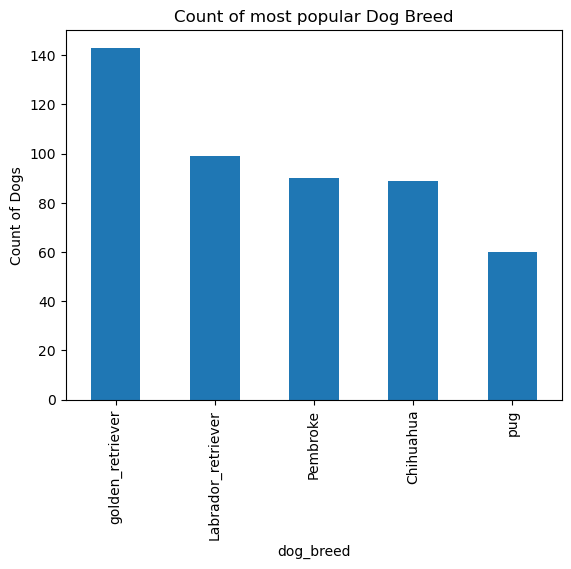

In [75]:
tweet_archive_master.query('dog_breed != "None"').groupby('dog_breed').count()['tweet_id'].sort_values(ascending= False).head().plot(kind = 'bar')
plt.ylabel('Count of Dogs')
plt.title('Count of most popular Dog Breed')
plt.show();


We can see that the top 5 dog breeds are:

  - Golden retriever
  - Labrador retriever
  - Pembroke
  - Chihuahua
  - Pug

Now, let's check for the most popular dog stage.

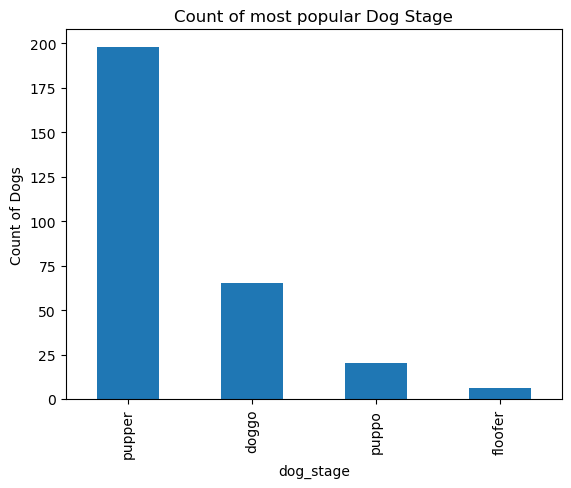

In [76]:
tweet_archive_master.query('dog_stage != "None"').groupby('dog_stage').count()['tweet_id'].sort_values(ascending= False).head().plot(kind = 'bar')
plt.ylabel('Count of Dogs')
plt.title('Count of most popular Dog Stage')
plt.show();

From the above plot, we can see that the most popular dog stage is the **pupper** and the least popular is the **foofer**

Let's see if there are any patterns in the days the tweets are posted.

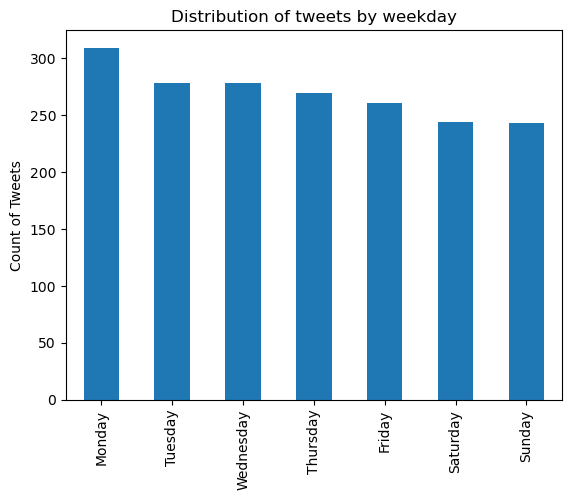

In [77]:
tweet_archive_master['timestamp'].dt.day_name().value_counts().sort_values(ascending= False).plot(kind = 'bar')
plt.ylabel('Count of Tweets')
plt.title('Distribution of tweets by weekday')
plt.show();

We can see that there almost no difference in the number of tweets per weekday

Let's see the most popular dog names

In [78]:
tweet_archive_master.query("name != 'None'").name.value_counts().head(10)

Charlie    9
Penny      9
Tucker     9
Cooper     9
Oliver     9
Sadie      8
Winston    8
Lucy       8
Lola       7
Daisy      6
Name: name, dtype: int64

These are the most popular dog names